# Charged interactions

In addition to the van der Waals interactions, to model *real* chemical systems, it is also important to consider the interactions between charged species. 
Charged interactions are models using Coulomb's law [[1, 2](#references)], 

$$ E_{\text{Coulomb}}(r) = \frac{1}{4\pi\varepsilon_0}\frac{q_iq_je^2}{r}, $$ 

where, $q_i$ and $q_j$ are the electronic charge on the particles, $e$ is the charge of the electron, $\varepsilon_0$ is the dielectric permitivity of vacuum, and $r$ is the distance between the two point charges. 

The Python code below defines a function that models the electrostatic interaction using Coulomb's law and plots it.

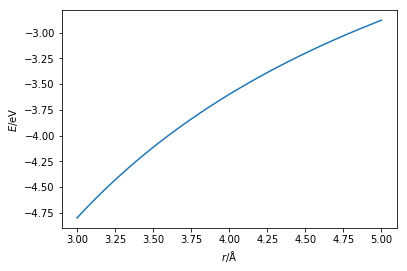

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, epsilon_0

def coulomb_energy(qi, qj, r):
    """
    Calculation of Coulomb's law.
    
    Parameters
    ----------
    qi: float
        Electronic charge on particle i
    qj: float
        Electronic charge on particle j
    r: float 
        Distance between particles i and j (Å)
        
    Returns
    -------
    float
        Energy of the Coulombic interaction (eV)
    """
    energy_joules = (qi * qj * e ** 2) / (
        4 * np.pi * epsilon_0 * r * 1e-10)
    return energy_joules / 1.602e-19

r = np.linspace(3, 5, 100)
plt.plot(r, coulomb_energy(1, -1, r))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.show()

The above code and plot can be thought of as the interaction between a sodium ion (Na<sup>+</sup>) and a chloride ion (Cl<sup>-</sup>).
These ions have opposite charges and therefore will be very strongly attracted to each other.
The above plot shows that the interaction is always attractive. 
However, if this were the case oppositely charged atoms would collapse into each other. 
This appears to be the case because we must also consider the van der Waals interaction that is present.  
This means that to determine the total potential energy for the Na<sup>+</sup> and Cl<sup>-</sup> interaction we must consider the sum of the van der Waals interaction (modelled with the Lennard-Jones potential model) and the charged interaction (modelled with Coulomb's law). 

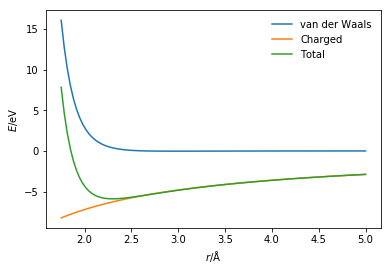

In [3]:
def lj_energy(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Energy of the van der Waals interaction (eV)
    """
    return 4 * epsilon * np.power(
        sigma / r, 12) - 4 * epsilon * np.power(
        sigma / r, 6)

r = np.linspace(1.75, 5, 100)
plt.plot(r, lj_energy(r, 0.0301, 2.65), 
         label='van der Waals')
plt.plot(r, coulomb_energy(1, -1, r), 
         label='Charged')
plt.plot(r, lj_energy(
    r, 0.0301, 2.65) + coulomb_energy(1, -1, r), 
         label='Total')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.legend(frameon=False)
plt.show()

The presence of the van der Waals interaction introduces the Pauli exclusion principle stopping the unphysical collapse of the two ions. 

## References

1. Coulomb, C. A. *Histoire de l’Académie Royale des Sciences* 1788, 569–577.
2. Coulomb, C. A. *Histoire de l’Académie Royale des Sciences* 1788, 578–611.